In [ ]:
'''
File to download both train and test data
'''
import pandas as pd
from student_resource.src.utils import download_images
from pathlib import Path
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv('train.csv')

(array([7.4879e+04, 1.0700e+02, 8.0000e+00, 2.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.300000e-01, 2.797170e+02, 5.593040e+02, 8.388910e+02,
        1.118478e+03, 1.398065e+03, 1.677652e+03, 1.957239e+03,
        2.236826e+03, 2.516413e+03, 2.796000e+03]),
 <BarContainer object of 10 artists>)

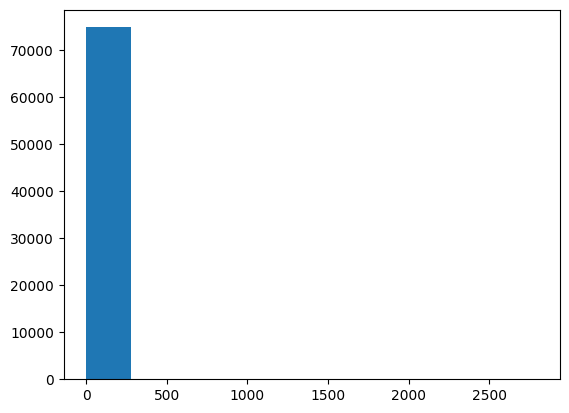

In [11]:
plt.hist(data['price'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7a02d8f5b3e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7a02d8f5b9b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a02d8e6e7b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7a02d8f5bc80>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a02d8e6e900>],
 'means': []}

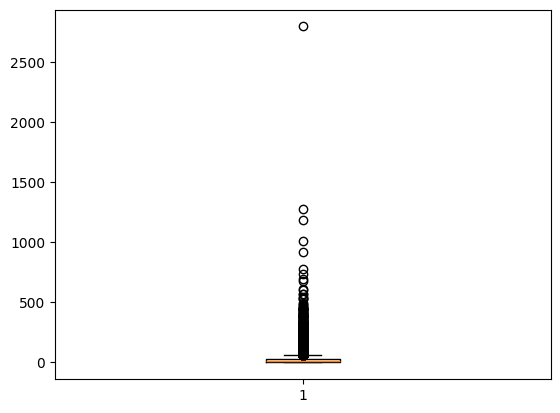

In [12]:
plt.boxplot(data['price'])

In [3]:
download_images(data['image_link'], 'train_images')

100%|██████████| 74999/74999 [02:25<00:00, 516.50it/s] 


In [14]:
from PIL import Image

min_ratio = [float('inf'), float('inf')]
for i, row in data.iterrows():
    name = Path(row['image_link']).name
    img = Image.open(f'train_images/{name}')
    min_ratio[0] = min(min_ratio[0], img.size[0])
    min_ratio[1] = min(min_ratio[1], img.size[1])
    

In [15]:
min_ratio

[30, 53]

In [7]:
fail_indexes = []
for i, row in data.iterrows():
    name = Path(row['image_link']).name
    try:
        with open(f'train_images/{name}') as f:
            pass
    except:
        fail_indexes.append(i)
        

In [9]:
fail_indexes

[38945]

In [10]:
data = data.drop(fail_indexes).reset_index(drop=True)

In [12]:
data.to_csv('train.csv', index=False)

In [4]:
data = pd.read_csv('student_resource/dataset/test.csv')

In [5]:
download_images(data['image_link'], 'test_images')

 53%|█████▎    | 39682/75000 [01:20<01:03, 555.45it/s] 

HTTP Error 404: Not Found


100%|██████████| 75000/75000 [02:24<00:00, 518.95it/s] 


In [4]:
fail_indexes = []
for i, row in data.iterrows():
    name = Path(row['image_link']).name
    try:
        with open(f'test_images/{name}') as f:
            pass
    except:
        fail_indexes.append(i)

In [5]:
fail_indexes

[42045]